In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
h = 0.001
nodos = 1000
precision_delta = 0.001

In [19]:
#condiciones de frontera para el circulo
R=0.1 #En metros
V_arco= 100

In [20]:
grid = np.zeros((nodos,nodos)) #la matriz de nodos

# x e y para el circulo
x = np.linspace(0,R,nodos)
y = np.linspace(0,R,nodos)

xv, yv = np.meshgrid(x,y)
circulo = np.sqrt(xv**2 + yv**2)

In [21]:
# seleccionando la región dentro del semicirculo
dentro = np.logical_and(circulo <= R, xv >= 0)
grid[dentro] = V_arco

In [22]:
#voltaje a tierra de los almabres rectos
grid[:,0]=0
grid[0,:]=0
grid[0,0]=0

In [23]:
#iteraciónes
iteraciones = 0
d_actual = 100

while d_actual > precision_delta:
    V_viejo = grid.copy()
    #recalculando el potencial electrico
    #DF_dentro = grid[1:-1,1:-1]
    
    # j-1=-2
    vecino_cercano_arriba = grid[:-2, 1:-1]
    
    #j+1=2
    vecino_cercano_abajo = grid[2:, 1:-1]
    
    # i-1=-2
    vecino_cercano_izquierda = grid[1:-1, :-2]
    
    # i+1=-2
    vecino_cercano_derecha = grid[1:-1, 2:]

    grid[1:-1, 1:-1] = (1/4) * ( vecino_cercano_arriba + vecino_cercano_abajo 
                            + vecino_cercano_izquierda + vecino_cercano_derecha )
    

    dentro = np.logical_and(circulo <= R, xv >= 0)
    grid[dentro] = V_arco
    grid[:,0]=0
    grid[0,:]=0
    grid[0,0]=0

    
    V_nuevo = grid
    #Diferencia entre el valor nuevo y el valor enterior en cada nodo calculado
    d_ij = (V_nuevo-V_viejo)/V_viejo
    d_ij[np.isnan(d_ij)] = 0 #division entre 0
    
    #promedio de la precisión
    d_actual = np.mean(d_ij)
    
    iteraciones += 1

    if iteraciones == 1000:
        break
    

C:\Users\brige\AppData\Local\Temp\ipykernel_22076\3289240236.py:35: RuntimeWarning: divide by zero encountered in divide
  d_ij = (V_nuevo-V_viejo)/V_viejo
C:\Users\brige\AppData\Local\Temp\ipykernel_22076\3289240236.py:35: RuntimeWarning: invalid value encountered in divide
  d_ij = (V_nuevo-V_viejo)/V_viejo


# Gráfica del potencial para el circulo

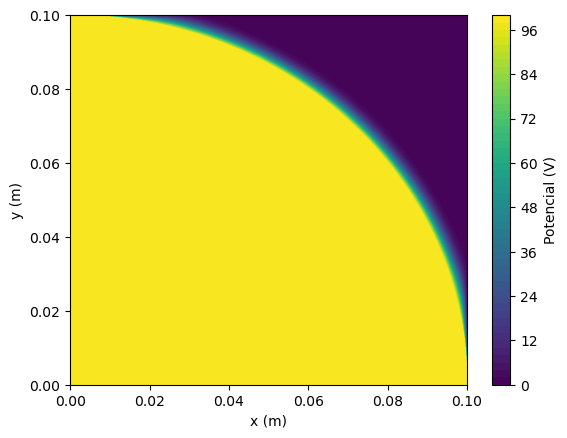

In [24]:
#grafica del potencial
plt.contourf(xv, yv, V_nuevo, 50)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.colorbar(label="Potencial (V)")
plt.show()

# Zoom del potencial cerca de los alambres conectados a tierra

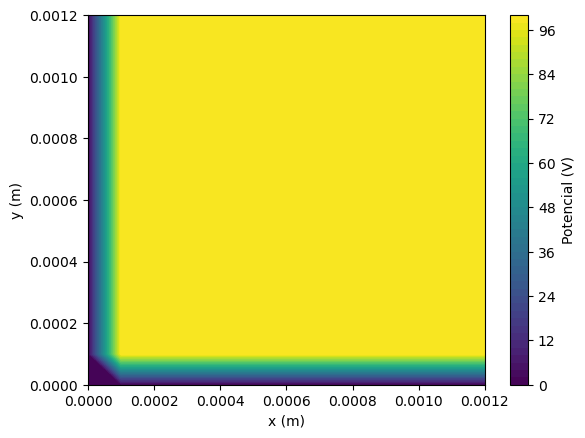

In [28]:

plt.contourf(xv, yv, V_nuevo, 50)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.xlim(0,0.0012)
plt.ylim(0,0.0012)
plt.colorbar(label="Potencial (V)")
plt.show()